In [1]:
import fastai
from fastai.text import *
from fastai import *

In [4]:
imdb = URLs.IMDB_SAMPLE
imdb

'http://files.fast.ai/data/examples/imdb_sample'

In [7]:
path = Path("F:\\data\\fastai")
dest = path/'imdb_sample'
fname = path/'imdb_sample.tar.gz'

In [9]:
data = untar_data(imdb,fname = fname,dest=dest)

In [10]:
dest.ls()

[WindowsPath('F:/data/fastai/imdb_sample/texts.csv')]

In [11]:
df = pd.read_csv(dest/'texts.csv')
df.head()

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


### 初始化 dataBunch

In [12]:
bunch = TextClasDataBunch.from_csv(dest,'texts.csv')

In [13]:
bunch.show_batch()

text,target
"xxbos xxfld 1 xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n\n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , xxunk bowl of xxunk . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj",negative
"xxbos xxfld 1 xxup the xxup shop xxup around xxup the xxup corner is one of the xxunk and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come",positive
"xxbos xxfld 1 xxmaj this film sat on my xxmaj xxunk for weeks before i watched it . i xxunk a self - indulgent xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the xxunk - up xxunk of xxmaj new xxmaj xxunk . \n\n xxmaj the format is the same as xxmaj max xxmaj xxunk ' "" xxmaj la xxmaj xxunk",positive
"xxbos xxfld 1 xxmaj many xxunk that this is n't just a classic due to the fact that it 's the first xxup 3d game , or even the first xxunk - up . xxmaj it 's also one of the first xxunk games , one of the xxunk definitely the first ) truly claustrophobic games , and just a pretty well - xxunk gaming experience in general . xxmaj",positive
"xxbos xxfld 1 i really wanted to love this show . i truly , honestly did . \n\n xxmaj for the first time , gay viewers get their own version of the "" xxmaj the xxmaj xxunk "" . xxmaj with the help of his obligatory "" hag "" xxmaj xxunk , xxmaj james , a good looking , well - to - do thirty - something has the chance",negative


In [14]:
bunch.save()

In [15]:
bunch.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the',
 ',']

In [21]:
bunch.train_ds[0][0].data[:10]

array([  2,   3,  44,  97, 767,   9, 293,  37,  46,  13], dtype=int64)

#### block api

In [24]:
im_data = (TextList.from_csv(path/'imdb_sample','texts.csv',cols='text').split_from_df(col = 2).label_from_df(cols=0).databunch())

In [25]:
im_data.show_batch()

text,target
"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n\n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , xxunk bowl of xxunk . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj victor xxmaj",negative
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the xxunk and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",positive
"xxbos xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj xxunk , after xxunk ) , i can xxunk join both xxunk of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n\n xxmaj it 's usually satisfying to watch a film director change his style / subject ,",negative
"xxbos xxmaj this film sat on my xxmaj xxunk for weeks before i watched it . i xxunk a self - indulgent xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the screwed - up xxunk of xxmaj new xxmaj xxunk . \n\n xxmaj the format is the same as xxmaj max xxmaj xxunk ' "" xxmaj la xxmaj xxunk , """,positive
"xxbos xxmaj many neglect that this is n't just a classic due to the fact that it 's the first xxup 3d game , or even the first xxunk - up . xxmaj it 's also one of the first xxunk games , one of the xxunk definitely the first ) truly claustrophobic games , and just a pretty well - xxunk gaming experience in general . xxmaj with graphics",positive


### Language model

In [28]:
path = Path('F:\\data\\fastai')
dest = path/'imdb'
fname = path/'imdb.tar.gz'

In [30]:
data = untar_data(URLs.IMDB,dest = dest,fname=fname)

In [32]:
data.ls()

[WindowsPath('F:/data/fastai/imdb/imdb.vocab'),
 WindowsPath('F:/data/fastai/imdb/README'),
 WindowsPath('F:/data/fastai/imdb/test'),
 WindowsPath('F:/data/fastai/imdb/train')]

In [33]:
lm_text_list = TextList.from_folder(data)

In [34]:
lm_text_list = lm_text_list.filter_by_folder(include=['train','test'])

In [35]:
lm_text_list = lm_text_list.random_split_by_pct(0.2)

In [36]:
lm_text_list = lm_text_list.label_for_lm()

In [39]:
data_lm = lm_text_list.databunch(bs = 48)

In [40]:
data_lm.save("tmp_lm")

In [41]:
data_lm.show_batch()

idx,text
0,"xxbos xxmaj walt xxmaj disney 's 20th animated feature was the last one to be greenlighted by the great man himself ( he died in late 1966 ) and is not generally considered to be among their very best output . xxmaj the main problem is that , on the surface , the film seems merely to be the feline version of either xxup lady xxup and xxup the xxup"
1,"catch that ... \n\n no one ... \n\n xxmaj that 's what this movie is about . xxmaj laughing at it is actually worth seeing it . xxmaj if you have 80 minutes to kill and this is on , it 's worth the laugh . xxmaj you 'll love xxmaj american ninja in the same way you love a cheesy horror movie . xxmaj ninjas running through crowded streets"
2,"film who are rather big in xxmaj australian xxup tv . xxmaj lisa xxunk xxrep 5 . xxmaj harold from xxmaj neighbours xxrep 7 . this movie gave me an extremely low opinion of these people that they will never be able to win back . xxmaj all xxmaj australian films are n't this bad , i promise you . xxmaj instead of this & % $ , check out"
3,"unfortunately the choreography was very poor . \n\n xxmaj on the up side -- it could have been longer ... xxbos xxup ok . i know that the wanna - be xxmaj john xxmaj hughes movies of the 80s were all unilaterally flat , so the expectations for this film ran pretty low . \n\n xxmaj still , after sitting through this crap there 's one key thing i ca"
4,"tired just remembering this movie . xxmaj kill xxmaj next xxmaj friday ! xxmaj kill ! xxbos i believe this movie could incite in me the same symptoms veterans of the xxmaj vietnam xxmaj war experience . xxmaj this movie was so vile , and it is only good now for a good campy laugh . xxmaj this was my brother 's favorite movie , so i was tortured with"


In [42]:
learner = language_model_learner(data_lm,pretrained_model=URLs.WT103_1,drop_mult=0.3)

ConnectionError: HTTPSConnectionPool(host='s3.amazonaws.com', port=443): Read timed out.

#### 分类

In [47]:
data = untar_data(URLs.IMDB,dest = dest,fname=fname)

In [48]:
data.ls()

[WindowsPath('F:/data/fastai/imdb/imdb.vocab'),
 WindowsPath('F:/data/fastai/imdb/models'),
 WindowsPath('F:/data/fastai/imdb/README'),
 WindowsPath('F:/data/fastai/imdb/test'),
 WindowsPath('F:/data/fastai/imdb/tmp_lm'),
 WindowsPath('F:/data/fastai/imdb/train')]

In [57]:
data_clas = (TextList.from_folder(data, vocab=data_lm.vocab))

In [58]:
data_clas = data_clas.split_by_folder(valid='test')

In [59]:
data_clas = data_clas.label_from_folder(classes=['neg','pos'])

In [66]:
data_clas = data_clas.databunch(bs = 48)

In [67]:
data_clas.save('tmp_clas')

In [68]:
data_clas.show_batch()

text,target
xxbos xxmaj match 1 : xxmaj tag xxmaj team xxmaj table xxmaj match xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley vs xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley started things off with a xxmaj tag xxmaj team xxmaj table xxmaj match against xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit . xxmaj according to the rules,pos
"xxbos xxup warning : xxup possible xxup spoilers ( but not really - keep reading ) . xxmaj ahhh , there are so many reasons to become utterly addicted to this spoof gem that i wo n't have room to list them all . xxmaj the opening credits set the playful scene with kitsch late 1950s cartoon stills ; an enchanting xxmaj xxunk ' xxmaj prez ' xxmaj prado mambo",pos
"xxbos xxmaj how strange the human mind is ; this center of activity wherein perceptions of reality are formed and stored , and in which one 's view of the world hinges on the finely tuned functioning of the brain , this most delicate and intricate processor of all things sensory . xxmaj and how much do we really know of it 's inner - workings , of it 's",pos
"xxbos xxmaj this film sat on my xxmaj tivo for weeks before i watched it . i dreaded a self - indulgent yuppie flick about relationships gone bad . i was wrong ; this was an engrossing excursion into the screwed - up libidos of xxmaj new xxmaj yorkers . \n\n xxmaj the format is the same as xxmaj max xxmaj ophuls ' "" xxmaj la xxmaj ronde , """,pos
"xxbos xxmaj as with all of xxmaj angelopoulos ' films , "" xxmaj the xxmaj suspended xxmaj step of the xxmaj stork "" implicitly demands a close and intimate participation on the part of the viewer , a fact that has certainly contributed to the limited popularity of his work . xxmaj dialogues are sparing , with no monologues or exchanges xxunk the characters ' inner conflicts , doubts ,",pos


In [69]:
learner = text_classifier_learner(data_clas,drop_mult=0.5)

In [71]:
learner.freeze()

In [72]:
learner.lr_find()

epoch     train_loss  valid_loss  accuracy
1         3.361939                
LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


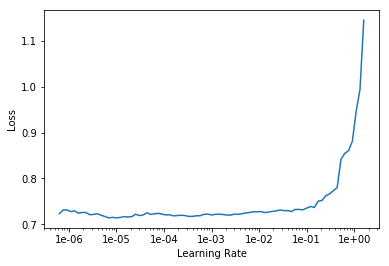

In [73]:
learner.recorder.plot()